In [1]:
import matplotlib.pyplot as plt
import numpy as np
from qutip import *

In [2]:
omegas = np.linspace(90,110,1000)
highest = []
for omega in omegas:
    # omega0 = 100, omega1 = 2 
    def cost(t,args):
        return np.cos(omega*t)
    def sint(t,args):
        return np.sin(omega*t)
    t = np.linspace(0,50,400)
    H0 = 50*sigmaz()
    H1 = sigmax()
    H2 = sigmay()
    H = [H0,[H1,cost],[H2,sint]]
    psi0 = basis(2,0)
    rhoNegativeZ = fock_dm(2,1)
    result = sesolve(H,psi0,t,[rhoNegativeZ])
    highest.append(max(result.expect[0]))

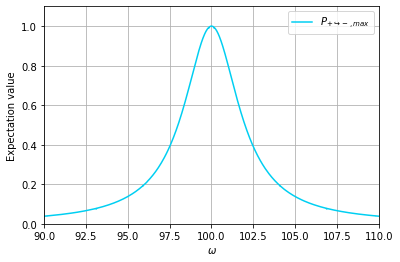

In [3]:
plt.plot(omegas,highest,color='#00CFF2')
plt.ylim(0,1.1)
plt.xlim(90,110)
plt.xlabel(r"$\omega$")
plt.ylabel("Expectation value")
plt.legend([r'$P_{+\hookrightarrow -,max}$'])
plt.style.use("seaborn-paper")
plt.grid()
plt.savefig("mypic.eps")
plt.show()
